<a href="https://colab.research.google.com/github/alonsomoros/colab/blob/main/1_3_DataAugmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [3]:
import os, glob, requests,  statistics
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
import numpy as np

from tensorflow.keras import layers, Sequential, models, losses, utils, Model
from tensorflow import image
from tensorflow.keras.datasets import cifar10

# Descargar imagen desde un url

In [4]:
def download_file(url, name):
    img_data = requests.get(url).content
    with open(name, 'wb') as handler:
        handler.write(img_data)

In [5]:
download_file("https://drive.google.com/uc?id=1xqWAcHjIXzCBPhMZugATiYWnbgl3mx_r", "Parrot.png")

In [6]:
import cv2
img_parrot = cv2.imread('/content/Parrot.png')
img_parrot = img_parrot / 255
display(img_parrot)

array([[[0.79607843, 0.59215686, 0.43529412],
        [0.79607843, 0.59215686, 0.43529412],
        [0.79215686, 0.58823529, 0.43137255],
        ...,
        [0.78039216, 0.57647059, 0.39607843],
        [0.78039216, 0.57647059, 0.39607843],
        [0.77647059, 0.57254902, 0.39215686]],

       [[0.79607843, 0.59215686, 0.43529412],
        [0.79607843, 0.59215686, 0.43529412],
        [0.79215686, 0.58823529, 0.43137255],
        ...,
        [0.77647059, 0.57254902, 0.39215686],
        [0.77647059, 0.57254902, 0.39215686],
        [0.77647059, 0.57254902, 0.39215686]],

       [[0.79215686, 0.59215686, 0.43529412],
        [0.79215686, 0.59215686, 0.43529412],
        [0.78823529, 0.58823529, 0.43137255],
        ...,
        [0.77647059, 0.57254902, 0.38823529],
        [0.77647059, 0.57254902, 0.38823529],
        [0.77647059, 0.57254902, 0.38823529]],

       ...,

       [[0.80392157, 0.61176471, 0.43921569],
        [0.80392157, 0.61176471, 0.43921569],
        [0.80784314, 0

# Transformaciones

## Crop

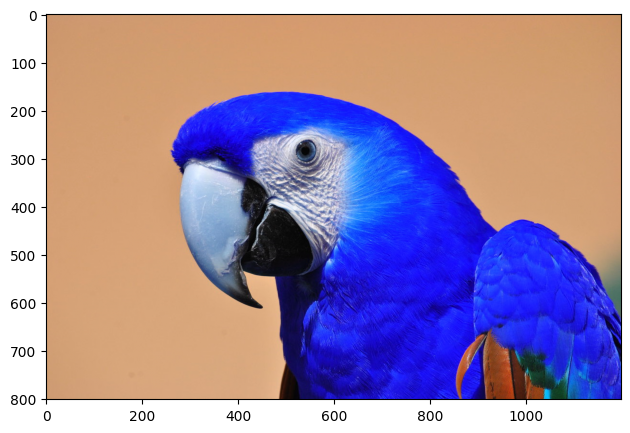

In [7]:
fig, ax = plt.subplots(1,1, figsize=(10,5))
ax.imshow(img_parrot)

plt.show()

In [8]:
transform = Sequential([
  layers.RandomCrop(512,512)
])
augmented_parrot_1 = transform(img_parrot)
augmented_parrot_2 = transform(img_parrot)
augmented_parrot_3 = transform(img_parrot)

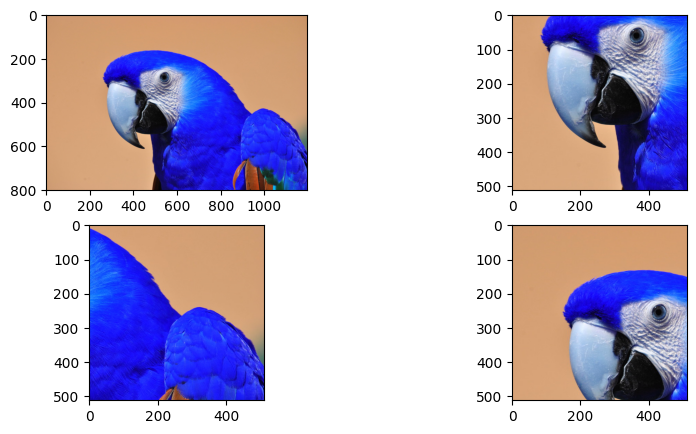

In [9]:
fig, ax = plt.subplots(2,2, figsize=(10,5))
ax[0][0].imshow(img_parrot)
ax[0][1].imshow(augmented_parrot_1)
ax[1][0].imshow(augmented_parrot_2)
ax[1][1].imshow(augmented_parrot_3)

plt.show()

## Horizontal flip

In [10]:
transform = Sequential([
  layers.RandomFlip('horizontal')
])
augmented_parrot = transform(img_parrot)

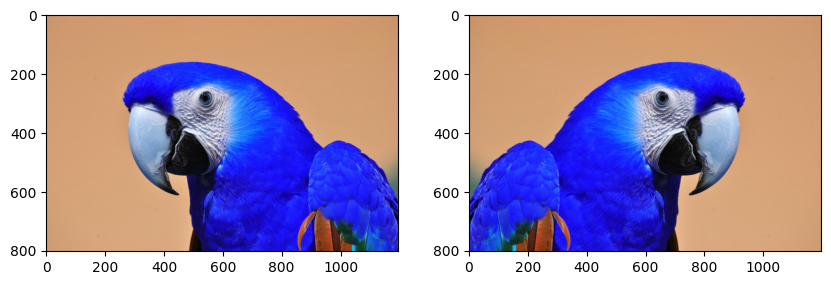

In [11]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].imshow(img_parrot)
ax[1].imshow(augmented_parrot)

plt.show()

## Vertical flip

In [42]:
transform = Sequential([
  layers.RandomFlip('vertical')
])
augmented_parrot = transform(img_parrot)

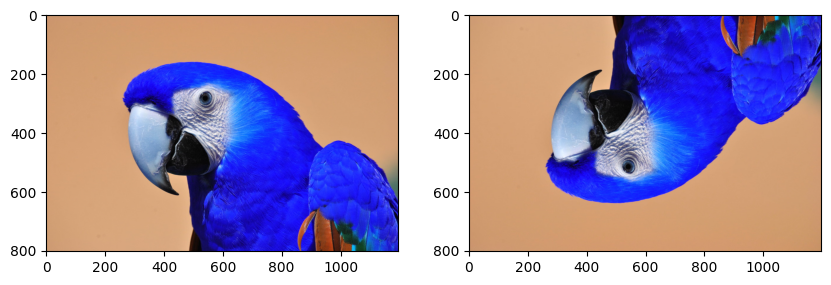

In [41]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].imshow(img_parrot)
ax[1].imshow(augmented_parrot)

plt.show()

## Rotation

In [30]:
transform = Sequential([
  layers.RandomRotation(factor=(-0.2, 0.2))
])
augmented_parrot = transform(img_parrot)

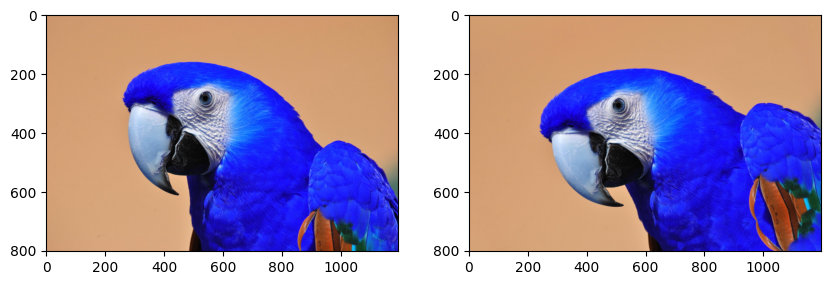

In [31]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].imshow(img_parrot)
ax[1].imshow(augmented_parrot)

plt.show()

## Translation

In [16]:
transform = Sequential([
  layers.RandomTranslation(height_factor=(-0.2, 0.2),
                           width_factor=(-0.2, 0.2),
                           fill_mode='constant')
])
augmented_parrot = transform(img_parrot)

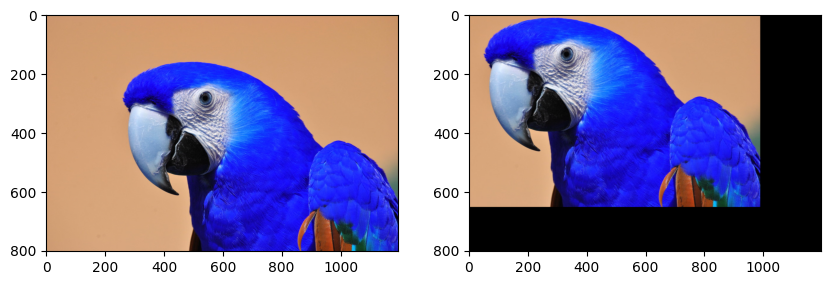

In [17]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].imshow(img_parrot)
ax[1].imshow(augmented_parrot)

plt.show()

## Brightness changes

In [43]:
augmented_parrot = image.stateless_random_brightness(img_parrot, max_delta=0.2, seed=(1,1))

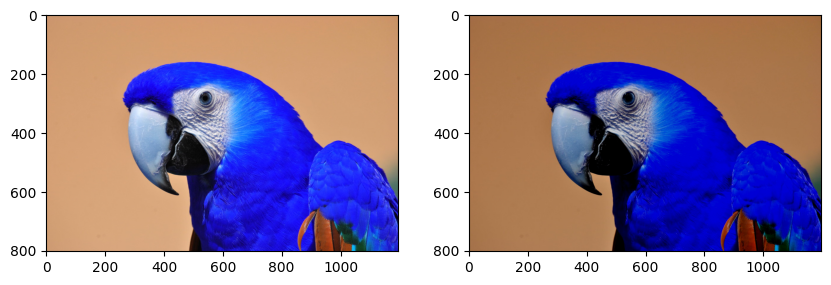

In [44]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].imshow(img_parrot)
ax[1].imshow(augmented_parrot)

plt.show()

## Contrast changes

In [45]:
transform = Sequential([
  layers.RandomContrast(factor=0.7)
])
augmented_parrot = transform(img_parrot)

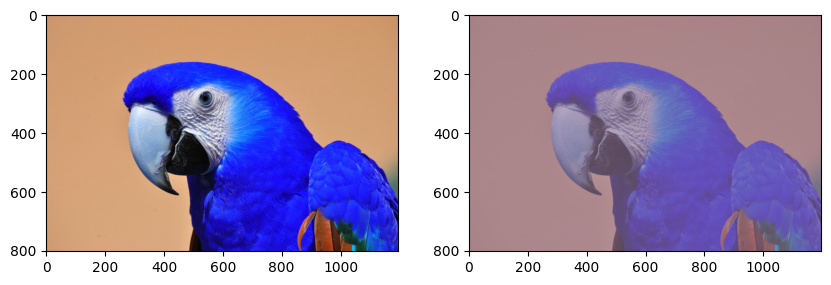

In [46]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].imshow(img_parrot)
ax[1].imshow(augmented_parrot)

plt.show()

## Hue changes

In [47]:
augmented_parrot = image.stateless_random_hue(img_parrot, max_delta=0.2, seed=(1,1))

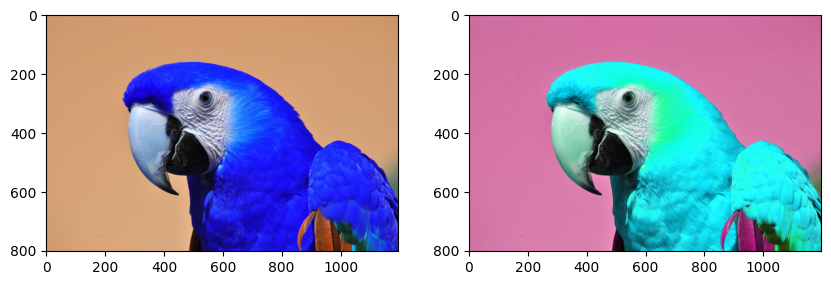

In [48]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].imshow(img_parrot)
ax[1].imshow(augmented_parrot)

plt.show()

# Cuidado... pájaros o flores quizá no pero ¿coches?

## Quality changes

In [49]:
augmented_parrot = image.stateless_random_jpeg_quality(img_parrot,
                                                       min_jpeg_quality=5,
                                                       max_jpeg_quality=15,
                                                       seed=(1,1))

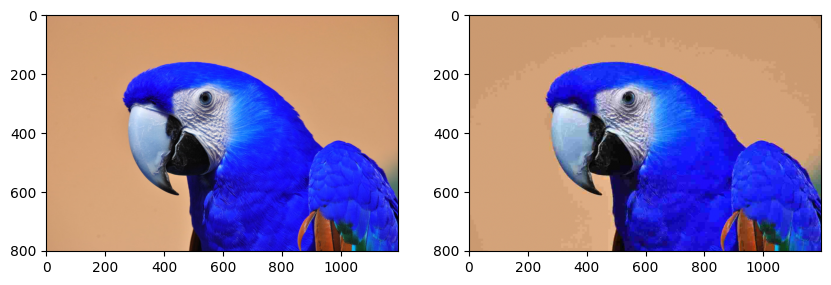

In [50]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].imshow(img_parrot)
ax[1].imshow(augmented_parrot)

plt.show()

# Prueba de entrenamiento con Data Augmentation

In [51]:
(X_train, y_train), (X_test, y_test) =  cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


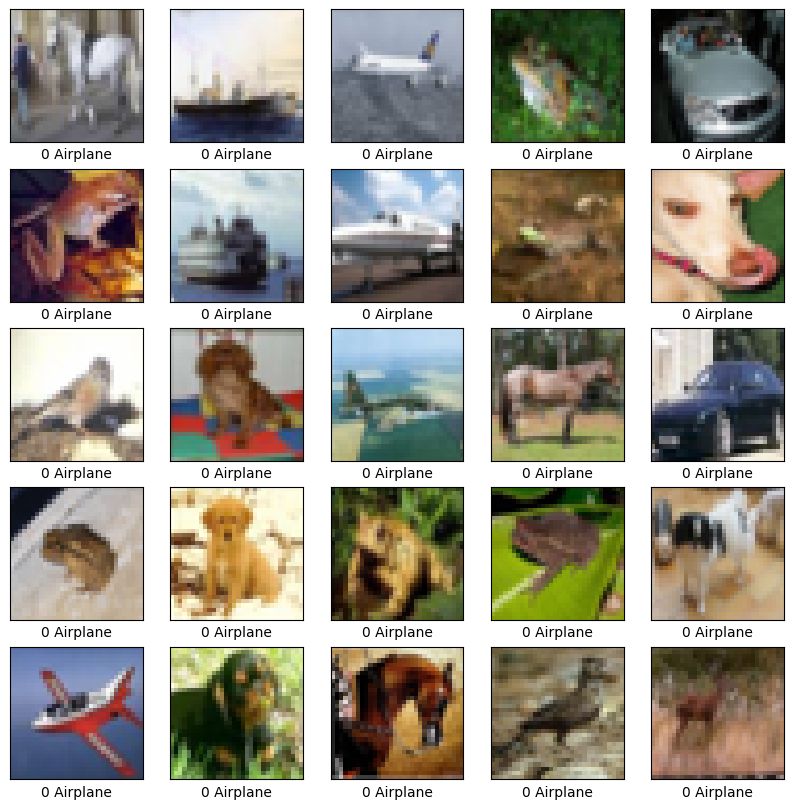

In [52]:
plt.figure(figsize=(10,10))
class_names =['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
seed=42
np.random.seed(seed)
indices = np.random.choice(len(X_train), size=25, replace=False)

for i, ix_img in enumerate(indices): # 25 images
  plt.subplot(5,5,i+1) # matrix of 5 X 5 array
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(X_train[ix_img], cmap=plt.cm.binary) # printing binary/black and white image
  class_ix=np.argmax(y_train[ix_img])
  plt.xlabel("%s %s" % (class_ix, class_names[class_ix])) # Assigning name to each image
plt.show()

In [53]:
# one hot encode outputs
y_train = LabelBinarizer().fit_transform(y_train)
y_test = LabelBinarizer().fit_transform(y_test)
num_classes = y_test.shape[1]

In [54]:
# Modelos sin aumentación

input = layers.Input(shape=(32, 32, 3))

# Keras model
x = layers.Conv2D(16, (3, 3), activation='relu')(input)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.Flatten()(x)
x = layers.Dense(512, activation='relu')(x)
output = layers.Dense(num_classes, activation='softmax')(x)

model = Model(input, output)

model.compile(optimizer='adam', loss=losses.CategoricalCrossentropy(), metrics=['accuracy'])
model.summary()

Model: "functional_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_19 (InputLayer)          │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 30, 30, 16)          │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 553,514 (2.11 MB)

 Trainable params: 553,514 (2.11 MB)

 Non-trainable params: 0 (0.00 B)

In [55]:
# Manually loading the dataset
history = model.fit(X_train, y_train, validation_split = 0.2, batch_size=512, epochs = 50)

Epoch 1/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 9s 53ms/step - accuracy: 0.2062 - loss: 10.6147 - val_accuracy: 0.4256 - val_loss: 1.6072
Epoch 2/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.4725 - loss: 1.4779 - val_accuracy: 0.4780 - val_loss: 1.4604
Epoch 3/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5643 - loss: 1.2432 - val_accuracy: 0.5141 - val_loss: 1.3737
Epoch 4/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6321 - loss: 1.0622 - val_accuracy: 0.5244 - val_loss: 1.3795
Epoch 5/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6913 - loss: 0.9102 - val_accuracy: 0.5196 - val_loss: 1.5002
Epoch 6/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7350 - loss: 0.7937 - val_accuracy: 0.5460 - val_loss: 1.3914
Epoch 7/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7905 - loss: 0.6283 - val_accuracy: 0.5534 - val_loss: 1.4100
Epoch 8/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8519 - loss: 0.4797 - val_accuracy: 0.5457 - val_lo

In [56]:
def plot_losses(history, save=False): # save: False or file name
    plt.rcParams['figure.figsize'] = [20, 5]
    f, (ax1, ax2) = plt.subplots(1, 2, sharex=True)

    ax1.set_title('Losses')
    ax1.set_xlabel('epoch')
    ax1.set_ylabel('loss')
    ax1.legend(loc="upper right")
    ax1.grid()
    ax1.plot(history['loss'], label='Training loss')
    ax1.plot(history['val_loss'], label='Validation loss')
    ax1.legend()

    ax2.set_title('Accuracy')
    ax2.set_xlabel('epoch')
    ax2.set_ylabel('acc')
    ax2.legend(loc="upper right")
    ax2.grid()
    ax2.plot(history['accuracy'], label='Training accuracy')
    ax2.plot(history['val_accuracy'], label='Validation accuracy')
    ax2.legend()

    if save:
        plt.savefig(save)

    plt.show()

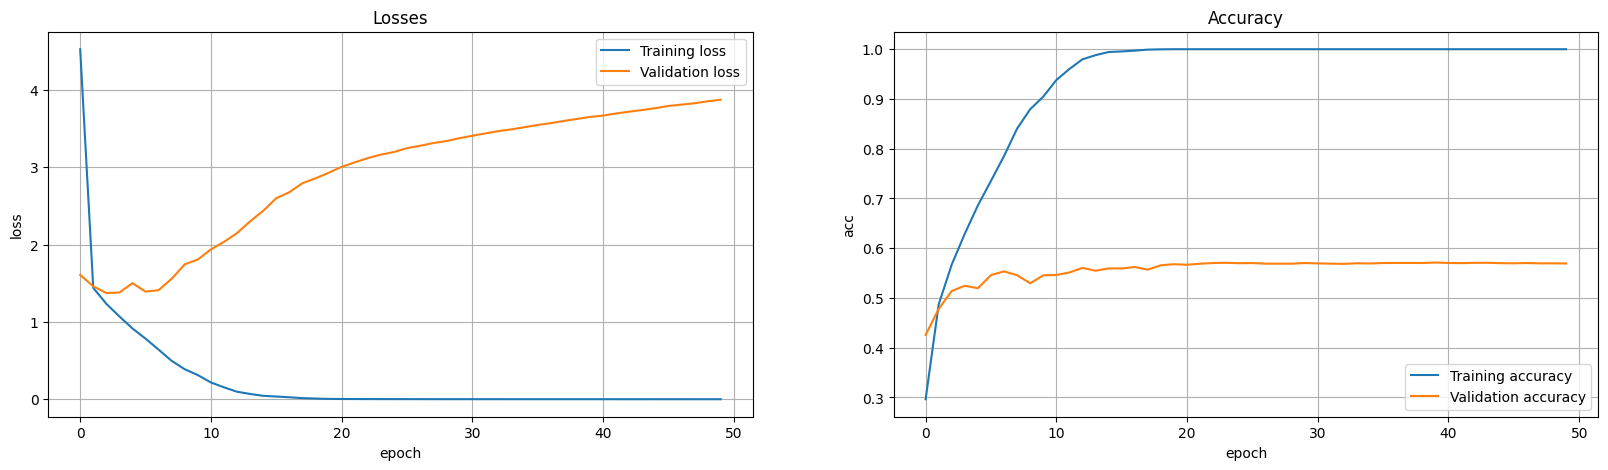

In [57]:
plot_losses(history.history,'no-aumentados.png')

In [58]:
# calculate error in X_test and y_test
score_no_aug = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score_no_aug[0])
print('Test accuracy:', score_no_aug[1])

Test loss: 3.837089776992798
Test accuracy: 0.5690000057220459


# Data augmentation

In [59]:
input = layers.Input(shape=(32, 32, 3))

# Data augmentation preprocessing layers
# More layers at https://keras.io/api/layers/preprocessing_layers/image_augmentation/
x = layers.RandomFlip("horizontal")(input)
x = layers.RandomRotation(0.1)(x)
x = layers.RandomZoom(0.1)(x)

# mejoras
x = layers.RandomFlip("vertical")(input)
x = layers.RandomRotation(0.1)(x)
x = layers.RandomZoom(0.1)(x)
x = layers.RandomContrast(0.1)(x)
x = layers.RandomBrightness(0.1)(x)
x = layers.RandomTranslation(0.1, 0.1)(x)


# Keras model
x = layers.Conv2D(16, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.Flatten()(x)
x = layers.Dense(512, activation='relu')(x)
output = layers.Dense(num_classes, activation='softmax')(x)

model = Model(input, output)

model.compile(optimizer='adam', loss=losses.CategoricalCrossentropy(), metrics=['accuracy'])
model.summary()

Model: "functional_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_20 (InputLayer)          │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_flip_15 (RandomFlip)          │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_rotation_3 (RandomRotation)   │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_zoom_1 (RandomZoom)           │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_contrast_1 (RandomContrast)   │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_brightness (RandomBrightness) │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_translation_1                 │ (None, 32, 32, 3)           │               0 │
│ (RandomTranslation)                  │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 30, 30, 16)          │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 15, 15, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 13, 13, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 4, 4, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 553,514 (2.11 MB)

 Trainable params: 553,514 (2.11 MB)

 Non-trainable params: 0 (0.00 B)

In [60]:
# Manually loading the dataset
history = model.fit(X_train, y_train, validation_split = 0.2, batch_size=512, epochs = 50)

Epoch 1/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.1570 - loss: 7.7919 - val_accuracy: 0.3066 - val_loss: 1.8843
Epoch 2/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.3107 - loss: 1.8684 - val_accuracy: 0.3570 - val_loss: 1.7981
Epoch 3/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.3471 - loss: 1.7612 - val_accuracy: 0.3546 - val_loss: 1.8389
Epoch 4/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.3732 - loss: 1.7065 - val_accuracy: 0.3681 - val_loss: 1.8560
Epoch 5/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.3969 - loss: 1.6537 - val_accuracy: 0.4176 - val_loss: 1.6417
Epoch 6/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.4152 - loss: 1.6066 - val_accuracy: 0.4292 - val_loss: 1.6289
Epoch 7/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.4307 - loss: 1.5766 - val_accuracy: 0.4591 - val_loss: 1.5586
Epoch 8/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.4358 - loss: 1.5544 - val_accuracy: 0.4746 - v

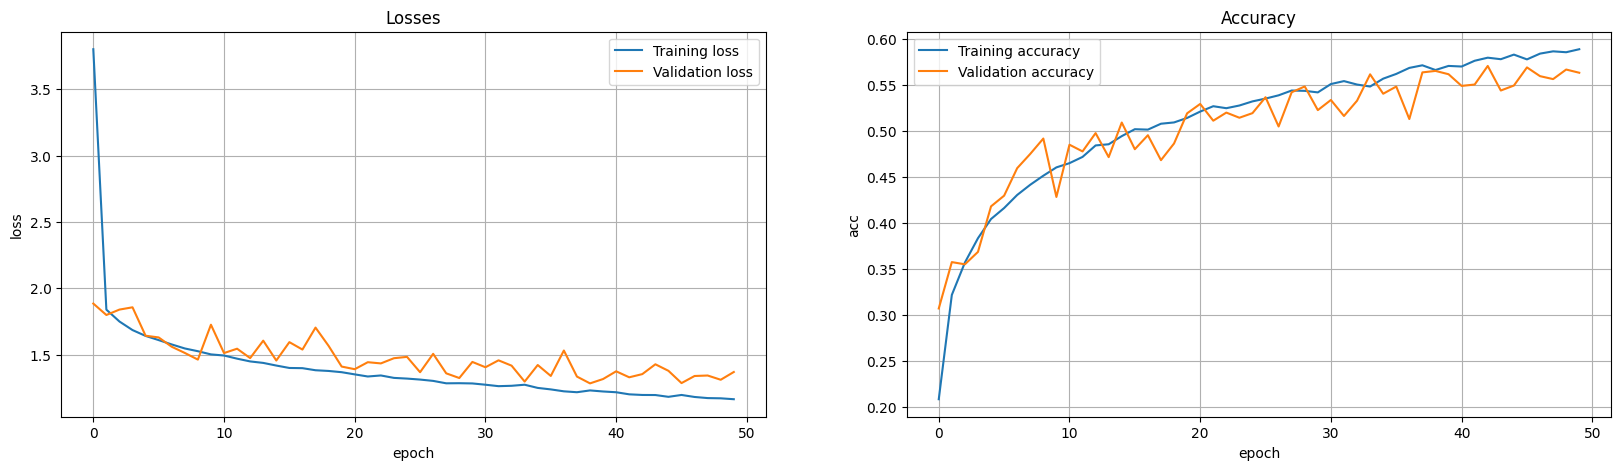

In [61]:
plot_losses(history.history, 'aumentados.png')

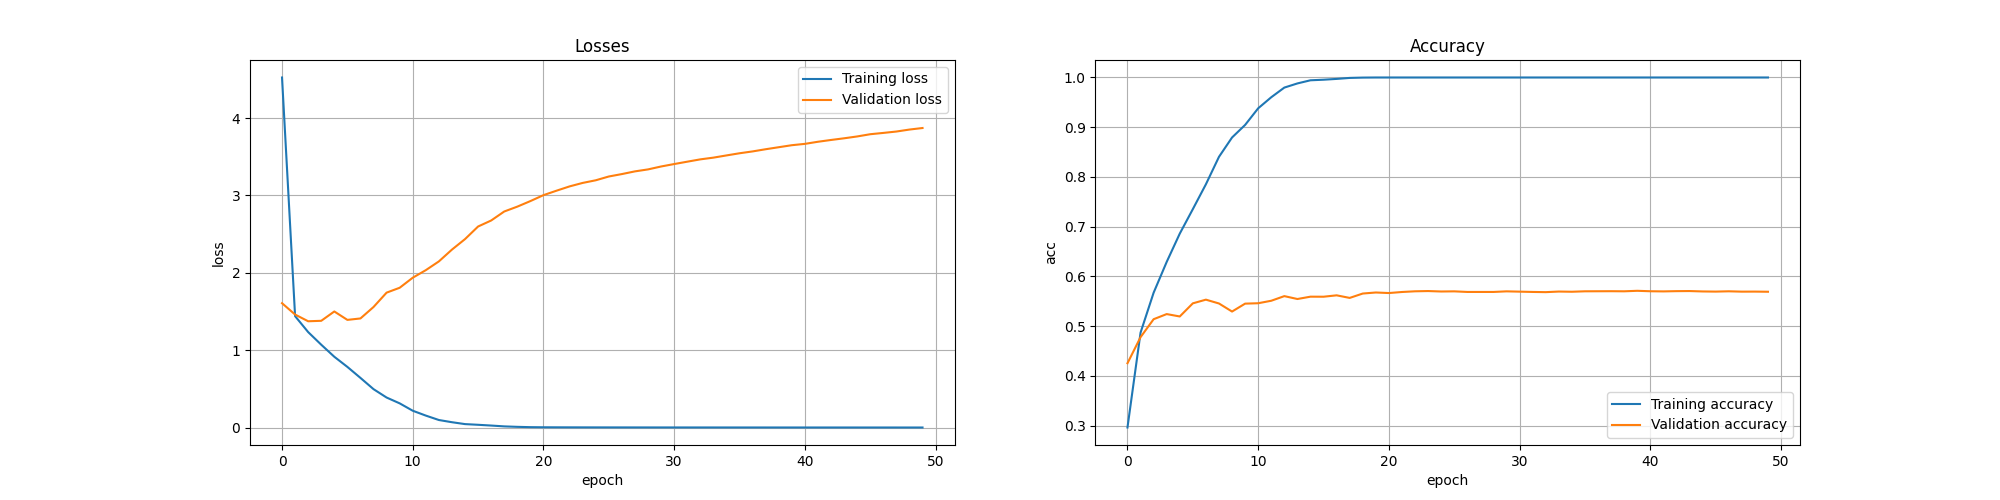

In [62]:
# show save figure 'no-aumentados.png'
from IPython.display import Image
Image('no-aumentados.png')

In [63]:
# calculate error in X_test and y_test
score_aug = model.evaluate(X_test, y_test, verbose=0)
score_aug

print('Test loss:', score_aug[0])
print('Test accuracy:', score_aug[1])

print('---')

print('Test loss:', score_no_aug[0])
print('Test accuracy:', score_no_aug[1])

Test loss: 1.3474799394607544
Test accuracy: 0.5622000098228455
---
Test loss: 3.837089776992798
Test accuracy: 0.5690000057220459


---

Creado por **Guillermo Iglesias** (guillermo.iglesias@upm.es)

<img src="https://licensebuttons.net/l/by-nc-sa/3.0/88x31.png">